<a href="https://colab.research.google.com/github/Christi049/AnomalyDetection_System/blob/main/anomoly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
credit_data = pd.read_csv('creditcard.csv', nrows=40000)
scaler = StandardScaler().fit_transform(credit_data.loc[:,credit_data.columns!='Class'])
scaled_data = scaler[0:40000]
df = pd.DataFrame(data=scaled_data)
X = credit_data.drop(columns=['Class'])
y = credit_data['Class']

In [3]:
outlier_fraction = len(credit_data[credit_data['Class']==1])/float(len(credit_data[credit_data['Class']==0]))
model =  IsolationForest(n_estimators=100, contamination=outlier_fraction, random_state=42)
model.fit(df)

IsolationForest(contamination=0.0026067776218167233, random_state=42)

In [4]:
scores_prediction = model.decision_function(df)
y_pred = model.predict(df)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
print("Accuracy in finding anomaly:",accuracy_score(y,y_pred))

Accuracy in finding anomaly: 0.997175


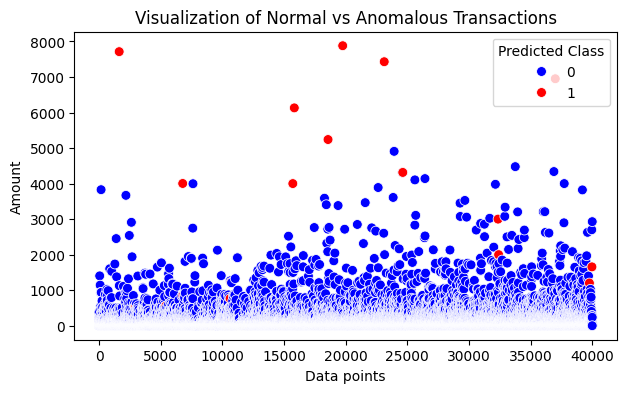

In [5]:
y_feature = credit_data['Amount']
credit_data['predicted_class'] = y_pred

plt.figure(figsize=(7, 4))
sns.scatterplot(x=credit_data.index, y=y_feature, hue=credit_data['predicted_class'], palette={0: 'blue', 1: 'red'}, s=50)
plt.title('Visualization of Normal vs Anomalous Transactions')
plt.xlabel('Data points')
plt.ylabel(y_feature.name)
plt.legend(title='Predicted Class', loc='best')
plt.show()
